In [1]:
from policy import qLearning
from datetime import datetime


start = datetime.now()

Q, stats = qLearning(limit=0.05, discount_factor=0.8, epsilon=0.1, symetries=True)

print(datetime.now() - start)


episodes played 118000
needed episodes : 118001
0:05:35.568225


In [4]:
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from matplotlib.offsetbox import AnnotationBbox, OffsetImage
import matplotlib.image as mpimg 
import numpy as np                            

I define the episode/game length as :
$$ l_{game} = \#(\text{played actions}) - \#(\text{actions of the optimal game}) $$

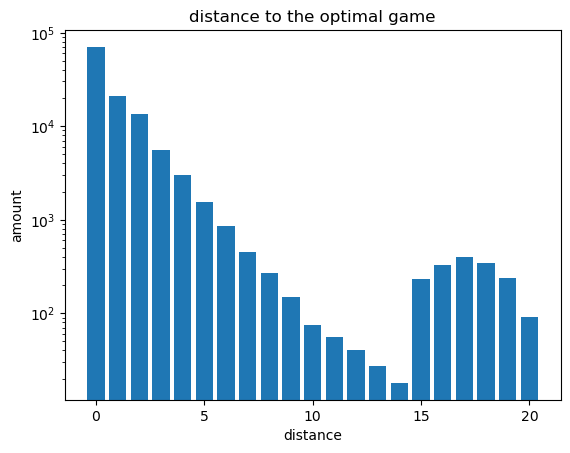

In [29]:
plt.bar(x = np.unique(stats['episode_lengths']),height = np.bincount(stats['episode_lengths']))
plt.title('distance to the optimal game')
plt.xlabel('distance')
plt.ylabel('amount')
plt.yscale('log')
plt.show()

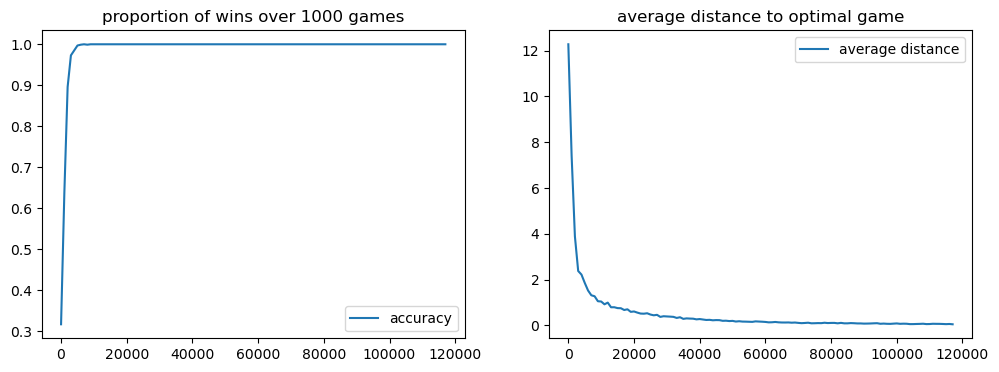

In [6]:
y_acc = stats['episode_acc'] # average of wins.
y_optim = stats['episode_optim'] # average distance to the optimal game.
x = np.arange(len(y_acc)) * len(stats['episode_lengths']) / len(y_acc)

fig, (ax1,ax2) = plt.subplots(1,2, figsize = (12,4))
ax1.plot(x, y_acc, label = 'accuracy')
ax2.plot(x,y_optim, label = 'average distance')
ax1.set_title('proportion of wins over 1000 games')
ax2.set_title('average distance to optimal game')
ax1.legend()
ax2.legend()
plt.show()

In [28]:
from states import game
from policy import coord_state
import os

images_path ='images'

g = game()

while not g.end:
   i,j = coord_state(g.history[-1])
   next_action = np.argmax(Q[i][j])
   g.next(next_action)

history = g.history
arr_golfeur = mpimg.imread(os.path.join(images_path,'golfeur.png'))
arr_drapeau = mpimg.imread(os.path.join(images_path,'drapeau_golf.png'))
golfeur = OffsetImage(arr_golfeur, zoom=0.08)
drapeau = OffsetImage(arr_drapeau, zoom=0.08) 
fig, ax = plt.subplots()
ab1 = AnnotationBbox(golfeur, history[0].ball )
ab2 = AnnotationBbox(drapeau, history[0].target )
M = history[0].M
l = np.array([k for k in range(M+1)]) - (M)/2



def init():
   ax.set_xlim(-M/2,M/2)
   ax.set_ylim(-M/2,M/2)
   ax.add_artist(ab1)
   ax.add_artist(ab2)
   ax.hlines(y=l, xmin=-M/2, xmax=M/2, color='black')
   ax.vlines(x=l, ymin=-M/2, ymax=M/2, color='black')
   return ab1,

def animate(i):
   ab1.xybox = history[i].ball
   return ab1,

animation = FuncAnimation(fig, animate, init_func=init, frames=len(history), interval=300, blit=True)

from IPython.display import HTML
display(HTML(animation.to_jshtml()))
plt.close()